In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("supermarket_sales.csv")

In [32]:
#df.head()

In [33]:
#df.isnull().sum()

In [34]:
df.drop(["cogs","gm_pct","5pct_markup","invoice_id"],axis=1,inplace=True)

In [35]:
#df.head()

In [36]:
# Count empty strings or whitespace-only strings in each column
#(df == '').sum()


In [37]:
gender_revenue = df.groupby("gender_customer")["revenue"].sum()
gender_revenue

gender_customer
Female    167882.925
Male      155083.824
Name: revenue, dtype: float64

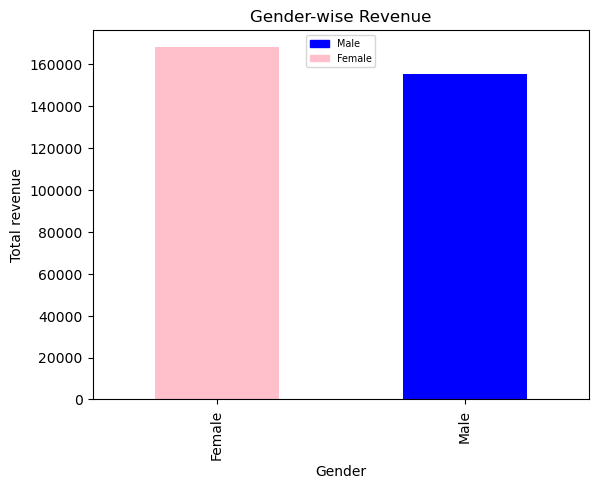

2

In [38]:
gender_revenue.plot(kind="bar",color=['pink','blue'])
plt.title("Gender-wise Revenue")
plt.xlabel("Gender")
plt.ylabel("Total revenue")
from matplotlib.patches import Patch
legend_labels = [Patch(color='blue', label='Male'), Patch(color='pink', label='Female')]
plt.legend(handles=legend_labels,loc="upper center",fontsize="x-small")
plt.show()
2

**Insight:**  
Female customers are the true power shoppers , their purchases drive higher revenue 
than their male counterparts.


In [39]:
df.shape

(1000, 13)

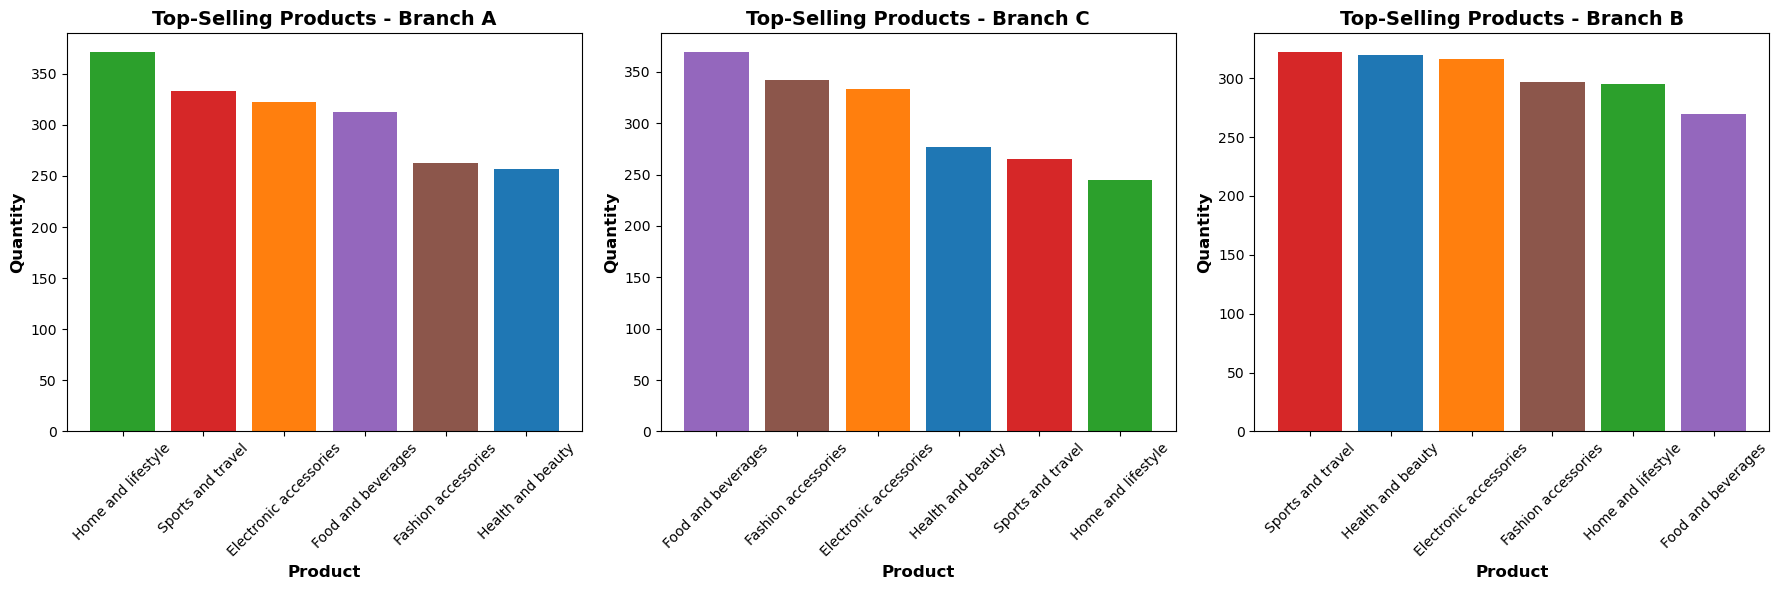

In [40]:
branches = df['branch'].unique()
products = df['product_line'].unique()
colors = plt.cm.tab10.colors  # 10 distinct colors

# Map each product to a specific color
product_colors = {product: colors[i % len(colors)] for i, product in enumerate(products)}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, branch in enumerate(branches):
    # Filter data
    branch_data = df[df['branch'] == branch]
    product_sales = branch_data.groupby('product_line')['quantity'].sum().sort_values(ascending=False)

    # Get colors based on product name
    bar_colors = [product_colors[product] for product in product_sales.index]

    # Bar plot
    axes[i].bar(product_sales.index, product_sales.values, color=bar_colors)
    axes[i].set_title(f'Top-Selling Products - Branch {branch}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Product', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Quantity', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

# Improve layout
plt.tight_layout()
plt.show()


**Insight:**  
Home and lifestyle dominate Branch A, Food & beverages dominate Branch B,  
and Sports and travel with Electronic accessories , Health and beauty lead in Branch C — Use this for restocking focus.


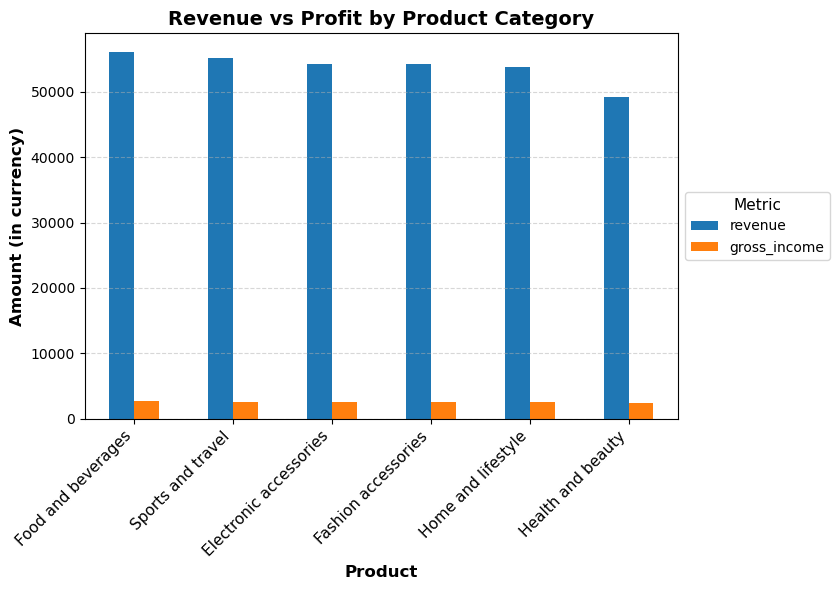

In [41]:
sales_profit = df.groupby('product_line')[['revenue', 'gross_income']].sum().sort_values('revenue', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
sales_profit.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'])

# Beautify the plot
ax.set_title('Revenue vs Profit by Product Category', fontsize=14, fontweight='bold')
ax.set_ylabel('Amount (in currency)', fontsize=12, fontweight='bold')
ax.set_xlabel('Product',fontsize=12,fontweight='bold')
ax.set_xticklabels(sales_profit.index, rotation=45, ha='right', fontsize=11)

# Move legend outside the plot
ax.legend(title='Metric', fontsize=10, title_fontsize=11, loc='center left', bbox_to_anchor=(1.0, 0.5))

# Grid and layout
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right for the legend

plt.show()


**Goal:** Identify best-performing product line in terms of revenue and gross income.

**Insights:** Food and beverages bring in the most revenue overall, which makes sense given their     everyday demand. Interestingly, electronic accessories, though not at the top in revenue, show a higher profit margin — they’re more profitable per sale. On the other hand, categories like health and beauty or home and lifestyle are lower in both revenue and profit, which might mean they need better promotion or offers to attract more customers.

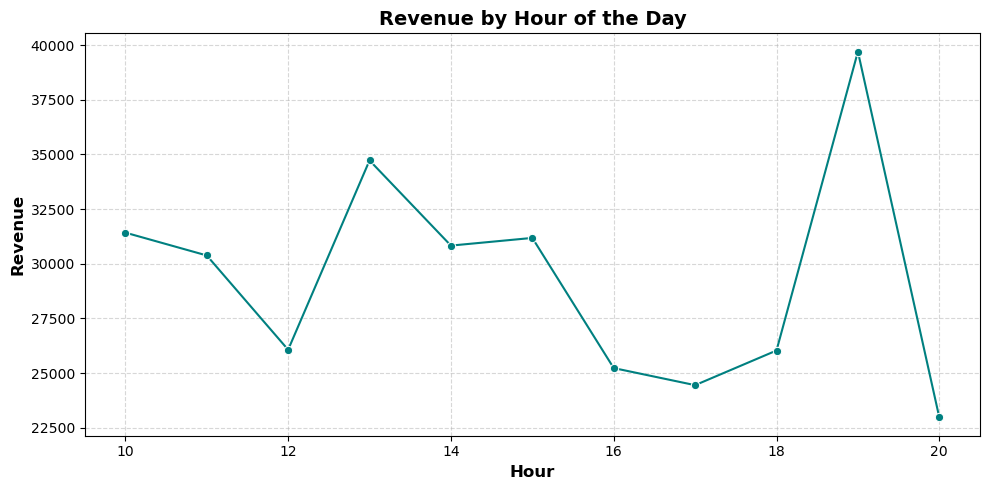

In [42]:
df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour
hourly_sales = df.groupby('hour')['revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_sales, x='hour', y='revenue', marker='o', color='teal')
plt.title('Revenue by Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour', fontsize=12, fontweight='bold')
plt.ylabel('Revenue', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### ⏰ Insight: Peak Sales Hours

The highest revenue occurs between **6 PM and 8 PM**, suggesting that evenings are the busiest time for shopping. This time window can be ideal for:
- Running promotional offers
- Scheduling more staff
- Managing checkout efficiency


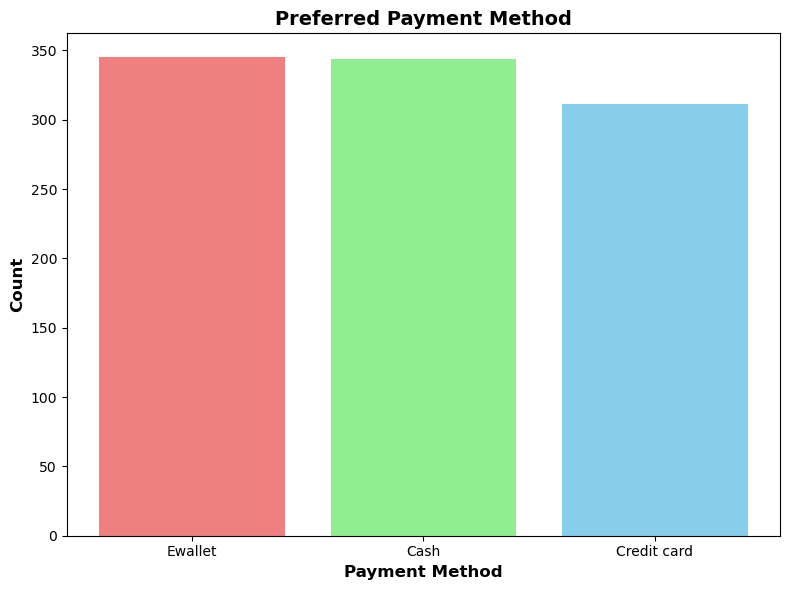

In [43]:
payment_counts = df['payment_method'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(payment_counts.index, payment_counts.values, color=['lightcoral', 'lightgreen', 'skyblue'])

# Set title and labels
plt.title('Preferred Payment Method', fontsize=14, fontweight='bold')
plt.xlabel('Payment Method', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

**💰Insights:**

Ewallets and cash are the two most commonly used payment methods, with nearly equal preference among customers. Credit card usage is noticeably lower, which may suggest that customers prefer faster or more straightforward payment options. This trend shows the importance of keeping both cash and digital wallet options smooth and reliable at checkout.

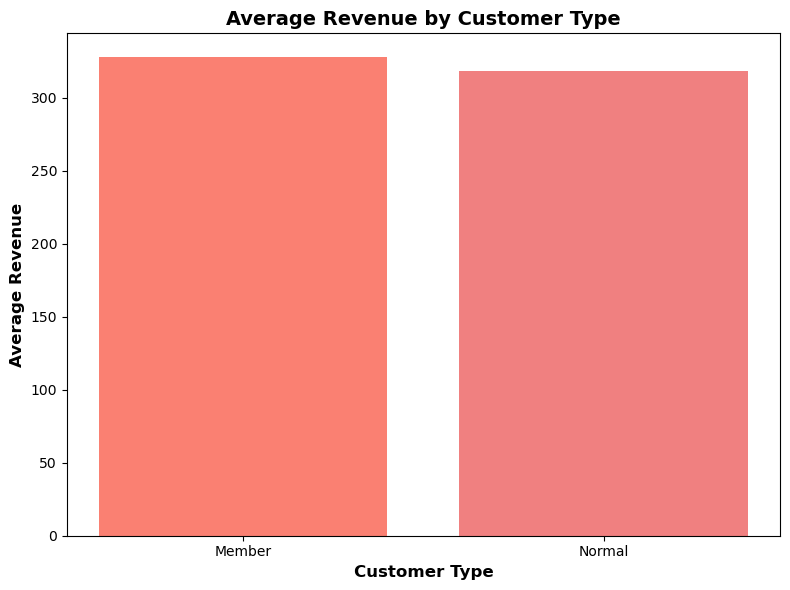

In [44]:
# Calculate average revenue per customer type
avg_revenue = df.groupby('customer_type')['revenue'].mean()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(avg_revenue.index, avg_revenue.values, color=['salmon', 'lightcoral'])

# Title and labels
plt.title('Average Revenue by Customer Type', fontsize=14, fontweight='bold')
plt.xlabel('Customer Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Revenue', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


**🧾 Insights:**

Revenue by Customer Type
Members tend to spend more on average compared to normal customers. This suggests that the membership program is attracting higher-value shoppers. To build on this, the business can focus on converting regular customers into members through targeted offers, exclusive benefits, or loyalty points — helping boost long-term revenue and customer retention.
